# Models

Regression Problem: The goal is to predict delay of flights.

In [3]:
import pandas as pd

In [66]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [67]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [68]:
#convert date to datetime
import datetime as dt

In [69]:
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

In [70]:
flights.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                     float64
cancellation_code              object
diverted    

In [71]:
flights_M0 = flights.select_dtypes(exclude=['object'])

In [74]:
#remove categorical int cols
flights_M0.drop(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'dep_time', 'dep_delay', 'taxi_out', 
    'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'cancelled',
    'diverted', 'actual_elapsed_time', 'air_time',
    'first_dep_time', 'total_add_gtime',
    'longest_add_gtime', 'no_name'], axis = 1, inplace = True)

In [75]:
flights_M0.head()

,fl_date,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-10,705,915,-2.0,130.0,1.0,822.0,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,800,1148,-9.0,168.0,1.0,1005.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,1034,1130,8.0,56.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,2200,2327,NaN,147.0,1.0,773.0,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0


In [76]:
flights_M0.fillna(0, inplace = True)

In [77]:
#split date into three cols
import datetime as dt
flights_M0['year'] = flights_M0['fl_date'].dt.year

In [78]:
flights_M0['month'] = flights_M0['fl_date'].dt.month
flights_M0['day'] = flights_M0['fl_date'].dt.day

In [79]:
flights_M0.drop(['fl_date'],axis = 1, inplace = True)

In [81]:
flights_M0.head()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day
0,705,915,-2.0,130.0,1.0,822.0,0.0,0.0,0.0,0.0,0.0,2018,7,10
1,800,1148,-9.0,168.0,1.0,1005.0,0.0,0.0,0.0,0.0,0.0,2019,10,10
2,1034,1130,8.0,56.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,2019,7,18
3,2200,2327,0.0,147.0,1.0,773.0,0.0,0.0,0.0,0.0,0.0,2018,11,25
4,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,2018,10,24


<AxesSubplot:>

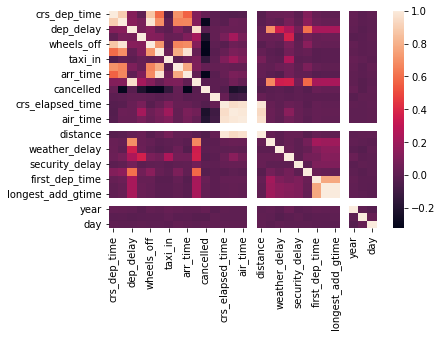

In [52]:
import seaborn as sns
sns.heatmap(flights.corr())

<AxesSubplot:>

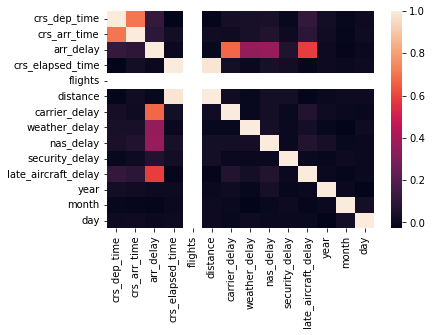

In [82]:
sns.heatmap(flights_M0.corr())

## Main Task: Regression Problem
The target variable is ARR_DELAY. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.

For example, variables CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights 1 week in advance.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
import warnings
warnings.filterwarnings('ignore')

## Model 0
Random Forest, SVR, Linear Regression

In [83]:
flights_M0.columns

Index(['crs_dep_time', 'crs_arr_time', 'arr_delay', 'crs_elapsed_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year', 'month', 'day'],
      dtype='object')

In [85]:
#Declare feature vector and target variable
X = flights_M0.drop(['arr_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'], axis = 1)
y = flights_M0['arr_delay']

In [86]:
X.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day'],
      dtype='object')

In [33]:
#maybe add stacked of these three?

# from sklearn.ensemble import StackingRegressor
# stacked = ??
# stacked.fit(X_train, y_train)    
# stacked_prediction = stacked.predict(X_test)

SyntaxError: invalid syntax (3168682620.py, line 3)

In [87]:
def regression(X, y, regressor_list):
    """
    produce regression and result for a list of regressors
    X = data
    y = target series
    regressor_list = list by regressor module    
    """
    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    #scale
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X_train)       #fit has a memory, don't use on test
    X_scaled_test = scalar.transform(X_test)           #scalar is an instance that has the memory
    
    #model
    for reg in regressor_list:
        model = reg()                                        # instantiate the regressor
        model.fit(X_scaled, y_train)                            # fit the model
        y_pred = model.predict(X_scaled_test)                   # Predict the Test set results
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
        print(f'Regressor: {reg} \n MSE = {MSE} \n R2 = {R2} \n ----------------------------')

In [88]:
regressor_list = [LinearRegression, SVR, RandomForestRegressor]

In [89]:
regression(X, y, regressor_list)

Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 MSE = 2316.8916080171725 
 R2 = 0.013723712824350365 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 MSE = 2427.318875708148 
 R2 = -0.033284008729967285 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 MSE = 2586.02937495 
 R2 = -0.10084539200158726 
 ----------------------------


## Model 1
Incoporate these additional features: weather, date into datetime modules, categorical variables to numeric variables

In [ ]:
#split into test train, then use k-fold cross-validation on train set, test

## Model 2
use variable selection on data from model 1

## Model 3
Grid Search (maybe randomized search, doesn't actually search all combos)